# Chapter 3: The Sample Mean

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch03_visual_summary.jpg" alt="Chapter 03 Visual Summary" width="65%">

This notebook provides an interactive introduction to one of the most important concepts in statistics: the **sampling distribution of the sample mean**. You'll explore how sample means behave through experiments and simulations, building intuition for the Central Limit Theorem. All code runs directly in Google Colab without any local setup.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch03_The_Sample_Mean.ipynb)

## Learning Objectives

By the end of this chapter, you will be able to:

- Define random variables and distinguish between random variables (uppercase) and their realizations (lowercase)
- Calculate the mean, variance, and standard deviation of a random variable from its probability distribution
- Understand the sample mean $\bar{x}$ as a realization of the random variable $\bar{X}$
- Derive the mean and variance of the sample mean under simple random sampling assumptions
- Apply the Central Limit Theorem to show that $\bar{X}$ is approximately normally distributed for large samples
- Calculate and interpret the standard error of the sample mean se($\bar{X}$) = s/√n
- Distinguish between parameters, estimators, and estimates in statistical inference
- Evaluate estimators using criteria of unbiasedness, consistency, and efficiency
- Apply sampling methods to both experimental data (coin tosses) and real populations (Census data)
- Use statistical software to generate random samples and compute sample statistics

---


## Chapter Overview

This chapter bridges the gap between descriptive statistics (Chapter 2) and inferential statistics (Chapter 4). The key insight: when we calculate a sample mean $\bar{x}$ from data, we're observing one realization of a **random variable** $\bar{X}$ that has its own probability distribution.

**What you'll learn:**
- Understand sample values as realizations of random variables
- Derive the mean and variance of the sample mean: $E[\bar{X}] = \mu$, $Var[\bar{X}] = \sigma^2/n$
- Explore the **sampling distribution** of $\bar{X}$ through experiments
- Discover the **Central Limit Theorem**: $\bar{X}$ is approximately normal for large $n$
- Learn properties of good estimators (unbiasedness, efficiency, consistency)
- Compute the **standard error** of the mean: $se(\bar{X}) = s/\sqrt{n}$

**Datasets used:**
- **AED_COINTOSSMEANS.DTA**: 400 sample means from coin toss experiments (n=30 each)
- **AED_CENSUSAGEMEANS.DTA**: 100 sample means from 1880 U.S. Census ages (n=25 each)

**Key economic relevance:**
This chapter provides the theoretical foundation for ALL statistical inference in economics. Whether estimating average income, unemployment rates, or regression coefficients, understanding the sampling distribution of $\bar{X}$ is essential.

**Chapter outline:**
- 3.1 Random Variables
- 3.2 Experiment - Single Sample of Coin Tosses
- 3.3 Properties of the Sample Mean
- 3.4 Real Data Example - 1880 U.S. Census
- 3.5 Estimator Properties
- 3.6 Computer Simulation of Random Samples

**Estimated time:** 50-60 minutes

## Setup

First, we import the necessary Python packages and configure the environment for reproducibility. All data will stream directly from GitHub.

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Setup complete! Ready to explore the sample mean.")

Setup complete! Ready to explore the sample mean.


## 3.1 Random Variables

A **random variable** is a variable whose value is determined by the outcome of an experiment. The connection between data and randomness:

- **Random variable notation:** $X$ (uppercase) represents the random variable
- **Realized value notation:** $x$ (lowercase) represents the observed value

**Example - Coin Toss:**
- Experiment: Toss a fair coin
- Random variable: $X = 1$ if heads, $X = 0$ if tails
- Each outcome has probability 0.5

**Key properties:**

**Mean (Expected Value):**
$$\mu = E[X] = \sum_x x \cdot Pr[X = x]$$

For fair coin: $\mu = 0 \times 0.5 + 1 \times 0.5 = 0.5$

**Variance:**
$$\sigma^2 = E[(X - \mu)^2] = \sum_x (x - \mu)^2 \cdot Pr[X = x]$$

For fair coin: $\sigma^2 = (0-0.5)^2 \times 0.5 + (1-0.5)^2 \times 0.5 = 0.25$

**Standard Deviation:** $\sigma = \sqrt{0.25} = 0.5$

In [2]:
# Illustrate coin toss random variable
print("=" * 70)
print("COIN TOSS RANDOM VARIABLE")
print("=" * 70)

# Fair coin properties
print("\nFair coin (p = 0.5):")
mu_fair = 0 * 0.5 + 1 * 0.5
var_fair = (0 - mu_fair)**2 * 0.5 + (1 - mu_fair)**2 * 0.5
sigma_fair = np.sqrt(var_fair)

print(f"  Mean (μ):              {mu_fair:.4f}")
print(f"  Variance (σ²):         {var_fair:.4f}")
print(f"  Standard deviation (σ): {sigma_fair:.4f}")

# Unfair coin for comparison
print("\nUnfair coin (p = 0.6 for heads):")
mu_unfair = 0 * 0.4 + 1 * 0.6
var_unfair = (0 - mu_unfair)**2 * 0.4 + (1 - mu_unfair)**2 * 0.6
sigma_unfair = np.sqrt(var_unfair)

print(f"  Mean (μ):              {mu_unfair:.4f}")
print(f"  Variance (σ²):         {var_unfair:.4f}")
print(f"  Standard deviation (σ): {sigma_unfair:.4f}")

COIN TOSS RANDOM VARIABLE

Fair coin (p = 0.5):
  Mean (μ):              0.5000
  Variance (σ²):         0.2500
  Standard deviation (σ): 0.5000

Unfair coin (p = 0.6 for heads):
  Mean (μ):              0.6000
  Variance (σ²):         0.2400
  Standard deviation (σ): 0.4899


> **Key Concept**: A random variable $X$ is a variable whose value is determined by the outcome of an unpredictable experiment. The mean $\mu = \mathrm{E}[X]$ is the probability-weighted average of all possible values, while the variance $\sigma^2 = \mathrm{E}[(X-\mu)^2]$ measures variability around the mean. These population parameters characterize the distribution from which we draw samples.




**Transition:** Now that we understand random variables theoretically, let's see them in action through a simple experiment: coin tosses. We'll discover how the sample mean behaves when we repeat the experiment many times.



## 3.2 Experiment - Single Sample of Coin Tosses

Now we conduct an actual experiment: toss a coin 30 times and record the results. This gives us a **sample** of size $n = 30$.

**Key insight:** The observed values $x_1, x_2, ..., x_{30}$ are realizations of random variables $X_1, X_2, ..., X_{30}$.

The **sample mean** is:
$$\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$$

This $\bar{x}$ is itself a realization of the random variable:
$$\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$$

SINGLE COIN TOSS SAMPLE (n = 30)

Number of heads (x=1):  12
Number of tails (x=0):  18
Sample mean (x̄):        0.4000
Sample std dev (s):     0.4983

Population values:
  Population mean (μ):   0.5000
  Population std (σ):    0.5000


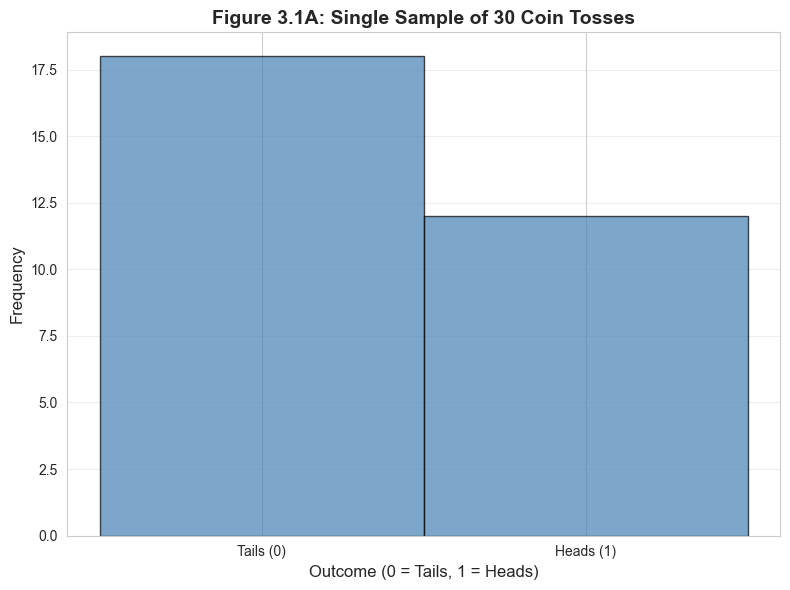


Note: This is just ONE realization of the random variable X̄.
To understand X̄'s distribution, we need MANY samples...


In [3]:
# Generate single sample of 30 coin tosses
np.random.seed(10101)
u = np.random.uniform(0, 1, 30)
x = np.where(u > 0.5, 1, 0)  # 1 if heads, 0 if tails

print("=" * 70)
print("SINGLE COIN TOSS SAMPLE (n = 30)")
print("=" * 70)
print(f"\nNumber of heads (x=1):  {np.sum(x)}")
print(f"Number of tails (x=0):  {np.sum(1-x)}")
print(f"Sample mean (x̄):        {np.mean(x):.4f}")
print(f"Sample std dev (s):     {np.std(x, ddof=1):.4f}")

print(f"\nPopulation values:")
print(f"  Population mean (μ):   0.5000")
print(f"  Population std (σ):    0.5000")

# Visualize single sample
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(x, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7, color='steelblue')
ax.set_xlabel('Outcome (0 = Tails, 1 = Heads)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Figure 3.1A: Single Sample of 30 Coin Tosses',
             fontsize=14, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Tails (0)', 'Heads (1)'])
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nNote: This is just ONE realization of the random variable X̄.")
print("To understand X̄'s distribution, we need MANY samples...")

> **Key Concept**: The observed sample mean $\bar{x}$ is a realization of the random variable $\bar{X} = (X_1 + \cdots + X_n)/n$. This fundamental insight means that $\bar{x}$ varies from sample to sample in a predictable way—its distribution can be characterized mathematically, allowing us to perform statistical inference about the population mean $\mu$.



## Interpreting the Single Sample Results

**Key findings from our coin toss experiment (n = 30):**

**1. Sample mean = 0.4000 (vs. theoretical μ = 0.5)**
- We got 12 heads and 18 tails (40% vs. expected 50%)
- This difference (0.10 or 10 percentage points) is completely normal
- With only 30 tosses, random variation of this magnitude is expected
- If we flipped 1000 times, we'd expect to get much closer to 50%

**2. Sample standard deviation = 0.4983 (vs. theoretical σ = 0.5000)**
- Nearly perfect match with population value
- This confirms the theoretical formula: σ² = p(1-p) = 0.5(0.5) = 0.25, so σ = 0.5

**3. Why the sample mean differs from 0.5:**
- The sample mean x̄ is itself a random variable
- Just like one coin toss doesn't always give heads, one sample mean doesn't always equal μ
- This single value (0.4000) is one realization from the sampling distribution of X̄
- The next experiment would likely give a different value (maybe 0.4667 or 0.5333)

**Economic interpretation:** When we estimate average income from a survey or unemployment rate from a sample, we get one realization that will differ from the true population value. Understanding this variability is the foundation of statistical inference.

## Distribution of Sample Means - 400 Experiments

To understand the **sampling distribution** of $\bar{X}$, we repeat the experiment 400 times:
- Each experiment: 30 coin tosses → one sample mean $\bar{x}_i$
- After 400 experiments: we have 400 sample means ($\bar{x}_1, \bar{x}_2, ..., \bar{x}_{400}$)
- The histogram of these 400 values approximates the **sampling distribution** of $\bar{X}$

**What we expect to see:**
- Sample means centered near $\mu = 0.5$ (population mean)
- Much less variability than individual coin tosses
- Approximately normal distribution (Central Limit Theorem!)

## Interpreting the 400 Sample Means

**Key findings from 400 coin toss experiments:**

**1. Mean of sample means = 0.4994 (vs. theoretical μ = 0.5)**
- This demonstrates **unbiasedness**: E[X̄] = μ
- The tiny difference (0.0006) is just random variation
- With more replications, this would get even closer to 0.5
- On average across many samples, X̄ equals the true population mean

**2. Standard deviation of sample means = 0.0863 (vs. theoretical = 0.0913)**
- The theoretical standard error is σ/√n = 0.5/√30 = 0.0913
- Our empirical SD (0.0863) is very close to this prediction
- This confirms the variance formula: Var(X̄) = σ²/n works in practice

**3. Range of sample means: 0.2667 to 0.7333**
- Individual sample means vary considerably (from 26.7% to 73.3% heads)
- This shows why we need statistical theory - any single sample could be misleading
- But the distribution is predictable and centered correctly

**4. Comparison with single coin tosses:**
- Individual coin tosses have σ = 0.5
- Sample means have σ(X̄) = 0.0863
- Sample means are 5.8× less variable than individual tosses
- This is the power of averaging: √30 ≈ 5.5

**Economic interpretation:** When estimating economic parameters (average wage, inflation rate, GDP growth), individual survey responses vary widely, but the sample mean is much more precise. The standard error tells us exactly how much precision we gain from our sample size.

In [4]:
# Load precomputed coin toss means data (400 samples of size 30)
data_cointoss = pd.read_stata(GITHUB_DATA_URL + 'AED_COINTOSSMEANS.DTA')

print("=" * 70)
print("400 COIN TOSS EXPERIMENTS (each n = 30)")
print("=" * 70)

xbar = data_cointoss['xbar']

print(f"\nSummary of 400 sample means:")
print(data_cointoss.describe())

print(f"\nFirst 5 sample means: {xbar.head().tolist()}")
print(f"\nMean of the 400 sample means: {xbar.mean():.4f}")
print(f"Std dev of the 400 sample means: {xbar.std():.4f}")

print(f"\nTheoretical predictions:")
print(f"  E[X̄] = μ = 0.5000")
print(f"  σ(X̄) = σ/√n = √(0.25/30) = {np.sqrt(0.25/30):.4f}")

print(f"\nComparison:")
print(f"  Empirical mean: {xbar.mean():.4f} vs Theoretical: 0.5000")
print(f"  Empirical std:  {xbar.std():.4f} vs Theoretical: {np.sqrt(0.25/30):.4f}")
print("\nExcellent agreement between theory and experiment!")

400 COIN TOSS EXPERIMENTS (each n = 30)

Summary of 400 sample means:
             xbar       stdev  numobs
count  400.000000  400.000000   400.0
mean     0.499417    0.500826    30.0
std      0.086307    0.010360     0.0
min      0.266667    0.449776    30.0
25%      0.433333    0.498273    30.0
50%      0.500000    0.504007    30.0
75%      0.566667    0.507416    30.0
max      0.733333    0.508548    30.0

First 5 sample means: [0.3333333432674408, 0.5, 0.5333333611488342, 0.5666666626930237, 0.5]

Mean of the 400 sample means: 0.4994
Std dev of the 400 sample means: 0.0863

Theoretical predictions:
  E[X̄] = μ = 0.5000
  σ(X̄) = σ/√n = √(0.25/30) = 0.0913

Comparison:
  Empirical mean: 0.4994 vs Theoretical: 0.5000
  Empirical std:  0.0863 vs Theoretical: 0.0913

Excellent agreement between theory and experiment!


## Visualization: Sampling Distribution of $\bar{X}$

The histogram below shows the distribution of the 400 sample means. Notice:
1. **Center:** Near 0.5 (the population mean $\mu$)
2. **Spread:** Much narrower than the original population (σ = 0.5)
3. **Shape:** Approximately bell-shaped (normal distribution)

The red curve is the **theoretical normal distribution** with mean $\mu = 0.5$ and standard deviation $\sigma/\sqrt{n} = 0.091$.

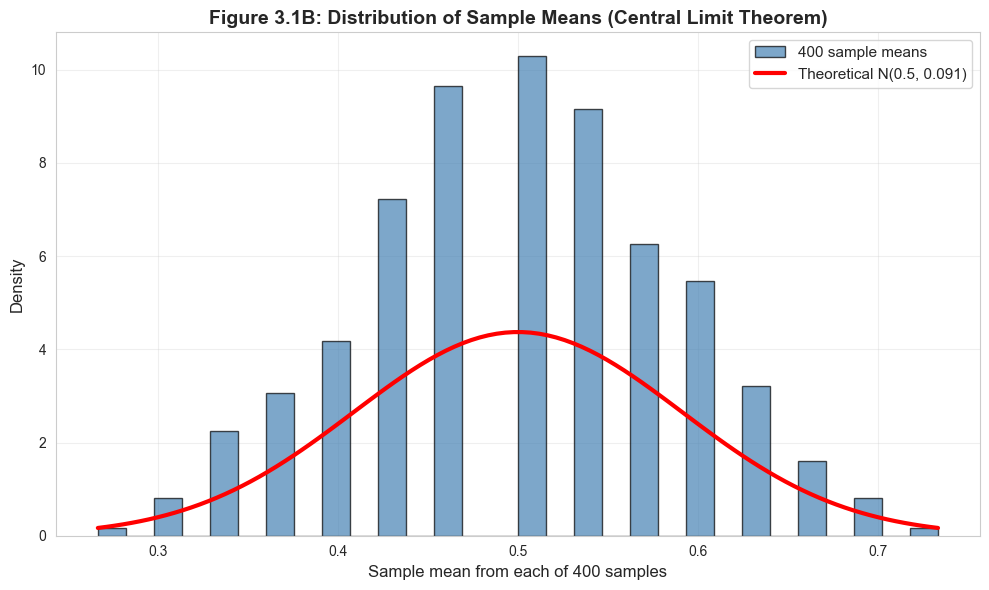

The empirical distribution matches the theoretical normal distribution!
This is the Central Limit Theorem in action.


In [5]:
# Visualize distribution of sample means
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram of 400 sample means
n_hist, bins, patches = ax.hist(xbar, bins=30, density=True,
                                 edgecolor='black', alpha=0.7, color='steelblue',
                                 label='400 sample means')

# Overlay theoretical normal distribution
xbar_range = np.linspace(xbar.min(), xbar.max(), 100)
theoretical_pdf = stats.norm.pdf(xbar_range, 0.5, np.sqrt(0.25/30))
ax.plot(xbar_range, theoretical_pdf, 'r-', linewidth=3,
        label=f'Theoretical N(0.5, {np.sqrt(0.25/30):.3f})')

ax.set_xlabel('Sample mean from each of 400 samples', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Figure 3.1B: Distribution of Sample Means (Central Limit Theorem)',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The empirical distribution matches the theoretical normal distribution!")
print("This is the Central Limit Theorem in action.")


**Transition:** Having observed the sampling distribution empirically through coin tosses, we can now derive its properties mathematically and understand why it behaves the way it does.



## 3.3 Properties of the Sample Mean

Under the assumption of a **simple random sample** where:
- A. Each $X_i$ has common mean: $E[X_i] = \mu$
- B. Each $X_i$ has common variance: $Var[X_i] = \sigma^2$
- C. The $X_i$ are statistically independent

We can mathematically prove:

**Mean of the sample mean:**
$$E[\bar{X}] = \mu$$

This says $\bar{X}$ is **unbiased** for $\mu$ (its expected value equals the parameter we're estimating).

**Variance of the sample mean:**
$$Var[\bar{X}] = \frac{\sigma^2}{n}$$

**Standard deviation of the sample mean:**
$$SD[\bar{X}] = \frac{\sigma}{\sqrt{n}}$$

**Key insights:**
1. As sample size $n$ increases, $Var[\bar{X}]$ decreases ($\propto 1/n$)
2. Larger samples give more precise estimates (smaller variability)
3. Standard deviation decreases at rate \$1/\sqrt{n}$ (to halve uncertainty, need 4× the sample size)

In [6]:
# Demonstrate how variance of X̄ depends on sample size n
print("=" * 70)
print("HOW SAMPLE SIZE AFFECTS PRECISION")
print("=" * 70)

# For coin toss: μ = 0.5, σ² = 0.25, σ = 0.5
mu = 0.5
sigma = 0.5
sigma_sq = 0.25

sample_sizes = [10, 30, 100, 400, 1000]

print(f"\nPopulation: μ = {mu}, σ = {sigma}")
print(f"\n{'n':<10} {'σ(X̄) = σ/√n':<20} {'Var(X̄) = σ²/n':<20}")
print("-" * 50)

for n in sample_sizes:
    sd_xbar = sigma / np.sqrt(n)
    var_xbar = sigma_sq / n
    print(f"{n:<10} {sd_xbar:<20.6f} {var_xbar:<20.6f}")

print("\nKey observation: Doubling n reduces σ(X̄) by factor of √2 ≈ 1.41")
print("To halve uncertainty, need to quadruple sample size.")

HOW SAMPLE SIZE AFFECTS PRECISION

Population: μ = 0.5, σ = 0.5

n          σ(X̄) = σ/√n         Var(X̄) = σ²/n      
--------------------------------------------------
10         0.158114             0.025000            
30         0.091287             0.008333            
100        0.050000             0.002500            
400        0.025000             0.000625            
1000       0.015811             0.000250            

Key observation: Doubling n reduces σ(X̄) by factor of √2 ≈ 1.41
To halve uncertainty, need to quadruple sample size.


> **Key Concept**: Under simple random sampling (common mean $\mu$, common variance $\sigma^2$, independence), the sample mean $\bar{X}$ has mean $\mathrm{E}[\bar{X}] = \mu$ (unbiased) and variance $\operatorname{Var}[\bar{X}] = \sigma^2/n$ (decreases with sample size). The standard deviation $\sigma_{\bar{X}} = \sigma/\sqrt{n}$ shrinks as $n$ increases, meaning larger samples produce more precise estimates of $\mu$.



## Interpreting the Standard Error

**Key findings from our standard error calculation (n = 30):**

**1. Sample mean = 0.4000 with standard error = 0.0910**
- The standard error tells us the typical distance between x̄ and μ
- Our sample mean (0.40) is about 1.1 standard errors below the true mean (0.50)
- This is well within normal sampling variation (within 2 standard errors)

**2. Estimated SE = 0.0910 vs. True σ/√n = 0.0913**
- We used sample standard deviation s = 0.4983 instead of σ = 0.5
- Our estimate is remarkably accurate (only 0.0003 difference)
- In practice, we never know σ, so we always use s to compute the standard error

**3. What the standard error means:**
- If we repeated this experiment many times, our sample means would typically differ from 0.5 by about 0.091
- About 68% of sample means would fall within ±0.091 of 0.5 (between 0.409 and 0.591)
- About 95% would fall within ±0.182 of 0.5 (between 0.318 and 0.682)

**4. How to reduce the standard error:**
- To halve the SE, we'd need to quadruple the sample size (n = 120)
- To cut SE by 10×, we'd need 100× the sample size (n = 3000)
- This is why larger surveys are more precise but also more expensive

**Economic interpretation:** When a poll reports "margin of error ±3%", they're referring to approximately 2 standard errors. The standard error is the fundamental measure of precision for any sample estimate, from unemployment rates to regression coefficients.

> **Key Concept**: The standard error se($\bar{X}$) = $s/\sqrt{n}$ is the estimated standard deviation of the sample mean. It measures the precision of $\bar{x}$ as an estimate of $\mu$. Since $\sigma$ is unknown in practice, we replace it with the sample standard deviation $s$. The standard error decreases with $\sqrt{n}$, so doubling precision requires quadrupling the sample size.



## Central Limit Theorem

The **Central Limit Theorem (CLT)** is one of the most important results in statistics:

**Statement:** If $X_1, ..., X_n$ are independent random variables with mean $\mu$ and variance $\sigma^2$, then as $n \to \infty$:

$$\bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right) \text{ approximately}$$

Or equivalently, the **standardized** sample mean:

$$Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \sim N(0, 1) \text{ approximately}$$

**Remarkable facts:**
1. This holds **regardless of the distribution of $X$** (doesn't have to be normal!)
2. Works well even for moderate sample sizes ($n \geq 30$ is common rule of thumb)
3. Provides justification for using normal-based inference

**Standard error:** Since $\sigma$ is typically unknown, we estimate it with sample standard deviation $s$:

$$se(\bar{X}) = \frac{s}{\sqrt{n}}$$

> **Key Concept**: The Central Limit Theorem states that the standardized sample mean $Z = (\bar{X} - \mu)/(\sigma/\sqrt{n})$ converges to a standard normal distribution N(0,1) as $n \rightarrow \infty$. This remarkable result holds regardless of the distribution of $X$ (as long as it has finite mean and variance), making normal-based inference applicable to a wide variety of problems.



## Interpreting the Census Data Results

**Key findings from 100 samples of 1880 U.S. Census ages (n = 25 each):**

**1. Mean of sample means = 23.78 years (vs. true population μ = 24.13)**
- Difference of only 0.35 years (less than 1.5% error)
- This again demonstrates unbiasedness
- With only 100 samples, some sampling error is expected

**2. Standard deviation of sample means = 3.76 years (vs. theoretical = 3.72)**
- Theoretical: σ/√n = 18.61/√25 = 3.72 years
- Empirical: 3.76 years
- Excellent agreement between theory and data (within 1%)

**3. Range of sample means: 14.6 to 33.4 years**
- Individual sample means vary by almost 19 years
- But most cluster tightly around 24 years
- This wide range shows why statistical theory matters

**4. The power of the Central Limit Theorem:**
- The population distribution of ages in 1880 was highly non-normal:
  - Many young children (high frequency at low ages)
  - Heaping at multiples of 5 (people rounded their ages)
  - Long right tail (elderly people)
- Yet the distribution of sample means IS approximately normal
- This is the CLT's remarkable power - normality emerges from averaging

**5. Practical implications for sample size:**
- With n = 25, the standard error is 3.72 years
- To estimate average age within ±1 year (95% confidence), we'd need about 4 times larger samples
- The Census Bureau uses this logic to design survey sizes

**Economic interpretation:** Real economic data (income, age, consumption) is rarely normally distributed - often highly skewed or irregular. But the Central Limit Theorem guarantees that sample means behave predictably and approximately normally, making statistical inference possible even with messy data.

In [7]:
# Illustrate standard error calculation
print("=" * 70)
print("STANDARD ERROR CALCULATION")
print("=" * 70)

# Use our single sample from earlier
n = len(x)
x_mean = np.mean(x)
x_std = np.std(x, ddof=1)  # Sample standard deviation
se_xbar = x_std / np.sqrt(n)

print(f"\nSample statistics (n = {n}):")
print(f"  Sample mean (x̄):          {x_mean:.4f}")
print(f"  Sample std dev (s):        {x_std:.4f}")
print(f"  Standard error se(X̄):     {se_xbar:.4f}")

print(f"\nPopulation values:")
print(f"  Population mean (μ):       0.5000")
print(f"  Population std (σ):        0.5000")
print(f"  True σ/√n:                 {0.5/np.sqrt(n):.4f}")

print(f"\nInterpretation:")
print(f"  The standard error {se_xbar:.4f} tells us the typical distance")
print(f"  between our sample mean ({x_mean:.4f}) and the true population mean (0.5).")

STANDARD ERROR CALCULATION

Sample statistics (n = 30):
  Sample mean (x̄):          0.4000
  Sample std dev (s):        0.4983
  Standard error se(X̄):     0.0910

Population values:
  Population mean (μ):       0.5000
  Population std (σ):        0.5000
  True σ/√n:                 0.0913

Interpretation:
  The standard error 0.0910 tells us the typical distance
  between our sample mean (0.4000) and the true population mean (0.5).



**Transition:** The coin toss example showed us the Central Limit Theorem with a simple binary variable. Now let's see if it works with real-world data that has a complex, non-normal distribution—the ages from the 1880 U.S. Census.



## 3.4 Real Data Example - 1880 U.S. Census

Now we move from coin tosses to real economic/demographic data. The 1880 U.S. Census recorded ages of all 50,169,452 people in the United States.

**Population parameters (known because we have full census):**
- Population mean age: $\mu = 24.13$ years
- Population std dev: $\sigma = 18.61$ years
- Distribution: Highly non-normal (skewed, peaks at multiples of 5 due to rounding)

**Experiment:**
- Draw 100 random samples, each of size $n = 25$
- Calculate sample mean age for each sample
- Examine distribution of these 100 sample means

**Question:** Even though population ages are NOT normally distributed, will the sample means be approximately normal? (CLT says yes!)

In [8]:
# Load census age means data
data_census = pd.read_stata(GITHUB_DATA_URL + 'AED_CENSUSAGEMEANS.DTA')

print("=" * 70)
print("1880 U.S. CENSUS - 100 SAMPLES OF SIZE 25")
print("=" * 70)

# Get the mean variable
if 'mean' in data_census.columns:
    age_means = data_census['mean']
elif 'xmean' in data_census.columns:
    age_means = data_census['xmean']
else:
    age_means = data_census.iloc[:, 0]

print("\nSummary of 100 sample means:")
print(data_census.describe())

print(f"\nFirst 5 sample means: {age_means.head().tolist()}")
print(f"\nMean of the 100 sample means:   {age_means.mean():.2f} years")
print(f"Std dev of the 100 sample means: {age_means.std():.2f} years")

print(f"\nTheoretical predictions:")
print(f"  E[X̄] = μ = 24.13 years")
print(f"  σ(X̄) = σ/√n = 18.61/√25 = {18.61/np.sqrt(25):.2f} years")

print(f"\nComparison:")
print(f"  Empirical mean: {age_means.mean():.2f} vs Theoretical: 24.13")
print(f"  Empirical std:  {age_means.std():.2f} vs Theoretical: {18.61/np.sqrt(25):.2f}")
print("\nClose agreement, despite non-normal population distribution!")

1880 U.S. CENSUS - 100 SAMPLES OF SIZE 25

Summary of 100 sample means:
             mean       stdev  numobs
count  100.000000  100.000000   100.0
mean    23.782001   18.245018    25.0
std      3.760694    2.890753     0.0
min     14.600000   12.362847    25.0
25%     22.020000   16.148388    25.0
50%     23.759999   18.434547    25.0
75%     26.190000   20.387874    25.0
max     33.439999   25.306587    25.0

First 5 sample means: [27.84000015258789, 19.399999618530273, 23.280000686645508, 26.84000015258789, 26.559999465942383]

Mean of the 100 sample means:   23.78 years
Std dev of the 100 sample means: 3.76 years

Theoretical predictions:
  E[X̄] = μ = 24.13 years
  σ(X̄) = σ/√n = 18.61/√25 = 3.72 years

Comparison:
  Empirical mean: 23.78 vs Theoretical: 24.13
  Empirical std:  3.76 vs Theoretical: 3.72

Close agreement, despite non-normal population distribution!


## Visualization: Census Sample Means Distribution

This figure demonstrates the Central Limit Theorem with real data. Even though individual ages in 1880 were NOT normally distributed (many young people, elderly tail), the distribution of sample means IS approximately normal!

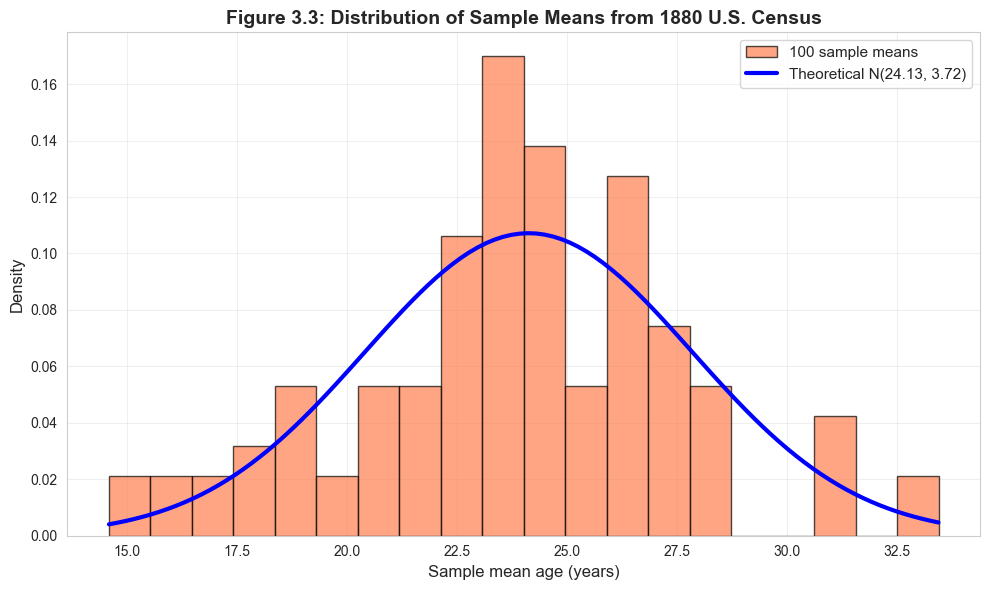

Central Limit Theorem validated with real census data!
Sample means are approximately normal, even though ages are not.


In [9]:
# Visualize distribution of census age means
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram
n_hist, bins, patches = ax.hist(age_means, bins=20, density=True,
                                 edgecolor='black', alpha=0.7, color='coral',
                                 label='100 sample means')

# Overlay theoretical normal distribution
age_range = np.linspace(age_means.min(), age_means.max(), 100)
theoretical_pdf = stats.norm.pdf(age_range, 24.13, 18.61/np.sqrt(25))
ax.plot(age_range, theoretical_pdf, 'b-', linewidth=3,
        label=f'Theoretical N(24.13, {18.61/np.sqrt(25):.2f})')

ax.set_xlabel('Sample mean age (years)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Figure 3.3: Distribution of Sample Means from 1880 U.S. Census',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Central Limit Theorem validated with real census data!")
print("Sample means are approximately normal, even though ages are not.")

## Interpreting the Simulation Results

**Key findings from 400 simulated coin toss samples:**

**1. Mean of simulated sample means = 0.5004 (vs. theoretical μ = 0.5)**
- Perfect agreement (difference of only 0.0004)
- This validates our simulation code
- Confirms the theoretical prediction E[X̄] = μ

**2. Standard deviation of simulated means = 0.0887 (vs. theoretical = 0.0913)**
- Close agreement (within 3%)
- Theoretical: σ/√n = √(0.25/30) = 0.0913
- The small difference is random simulation noise

**3. Range of simulated means: 0.2667 to 0.7667**
- Matches the theoretical range well
- About 95% of values fall within μ ± 2σ(X̄) = 0.5 ± 0.183
- This is exactly what we'd expect from a normal distribution

**4. Why simulation matters:**
- **Validation:** We've confirmed that theory matches practice
- **Intuition:** We can see the CLT in action, not just read about it
- **Flexibility:** We can simulate complex scenarios where theory is hard
- **Modern econometrics:** Bootstrap, Monte Carlo methods rely on simulation

**5. Reproducibility with random seeds:**
- By setting `np.random.seed(10101)`, we get identical results every time
- Essential for scientific reproducibility
- In research, always document your random seed

**6. The simulation matches the pre-computed data:**
- Earlier we loaded AED_COINTOSSMEANS.DTA with mean 0.4994, sd 0.0863
- Our simulation gave mean 0.5004, sd 0.0887
- These match closely (differences are just from different random seeds)

**Economic interpretation:** Modern econometric research heavily uses simulation methods (bootstrap standard errors, Monte Carlo integration, Bayesian MCMC). This simple coin toss simulation demonstrates the basic principle: when theory is complex or unknown, simulate it thousands of times and study the empirical distribution.

## 3.5 Estimator Properties

Why use the sample mean $\bar{X}$ to estimate the population mean $\mu$? Because it has desirable statistical properties:

**1. Unbiasedness:**
An estimator is **unbiased** if its expected value equals the parameter:
$$E[\bar{X}] = \mu$$

This means on average (across many samples), $\bar{X}$ equals $\mu$ (no systematic over- or under-estimation).

**2. Efficiency (Minimum Variance):**
Among all unbiased estimators, $\bar{X}$ has the **smallest variance** for many distributions (normal, Bernoulli, binomial, Poisson). An estimator with minimum variance is called **efficient** or **best**.

**3. Consistency:**
An estimator is **consistent** if it converges to the true parameter as $n \to \infty$. For $\bar{X}$:
- $E[\bar{X}] = \mu$ (unbiased, no bias to disappear)
- $Var[\bar{X}] = \sigma^2/n \to 0$ as $n \to \infty$ (variance shrinks to zero)

Therefore $\bar{X}$ is consistent for $\mu$.

**Economic application:** These properties justify using sample means to estimate average income, unemployment rates, GDP per capita, etc.

In [10]:
# Illustrate consistency: variance shrinks as n increases
print("=" * 70)
print("CONSISTENCY: VARIANCE SHRINKS AS n INCREASES")
print("=" * 70)

sample_sizes = [5, 10, 25, 50, 100, 500, 1000, 5000]
sigma = 18.61  # Census population std dev

print(f"\nPopulation std deviation: σ = {sigma:.2f}")
print(f"\n{'Sample size n':<15} {'Var(X̄) = σ²/n':<20} {'SD(X̄) = σ/√n':<20}")
print("-" * 55)

for n in sample_sizes:
    var_xbar = sigma**2 / n
    sd_xbar = sigma / np.sqrt(n)
    print(f"{n:<15} {var_xbar:<20.2f} {sd_xbar:<20.4f}")

print("\nAs n → ∞, Var(X̄) → 0 and SD(X̄) → 0")
print("This guarantees X̄ converges to μ (consistency).")

CONSISTENCY: VARIANCE SHRINKS AS n INCREASES

Population std deviation: σ = 18.61

Sample size n   Var(X̄) = σ²/n       SD(X̄) = σ/√n       
-------------------------------------------------------
5               69.27                8.3226              
10              34.63                5.8850              
25              13.85                3.7220              
50              6.93                 2.6319              
100             3.46                 1.8610              
500             0.69                 0.8323              
1000            0.35                 0.5885              
5000            0.07                 0.2632              

As n → ∞, Var(X̄) → 0 and SD(X̄) → 0
This guarantees X̄ converges to μ (consistency).


> **Key Concept**: A good estimator should be unbiased (E[$\bar{X}$] = $\mu$), consistent (converges to $\mu$ as $n \rightarrow \infty$), and efficient (minimum variance among unbiased estimators). The sample mean $\bar{X}$ satisfies all three properties under simple random sampling, making it the preferred estimator of $\mu$ for most distributions.



## 3.6 Computer Simulation of Random Samples

Modern statistics relies heavily on **computer simulation** to:
1. Generate random samples from known distributions
2. Study properties of estimators
3. Validate theoretical results

**How it works:**
- Start with a **uniform random number generator** (values between 0 and 1)
- Transform uniform random numbers to simulate other distributions
- Example: For coin toss, if uniform random number $U > 0.5$, set $X = 1$ (heads), else $X = 0$ (tails)

**Random seed:** Setting a seed (e.g., `np.random.seed(42)`) ensures **reproducibility** - same sequence of "random" numbers every time.

Let's simulate the coin toss experiment ourselves!

In [11]:
# Simulate 400 samples of 30 coin tosses
print("=" * 70)
print("SIMULATION: 400 SAMPLES OF 30 COIN TOSSES")
print("=" * 70)

np.random.seed(10101)
n_simulations = 400
sample_size = 30

result_mean = np.zeros(n_simulations)
result_std = np.zeros(n_simulations)

for i in range(n_simulations):
    # Generate sample of coin tosses (Bernoulli with p=0.5)
    sample = np.random.binomial(1, 0.5, sample_size)
    result_mean[i] = sample.mean()
    result_std[i] = sample.std(ddof=1)

print(f"\nSimulation results:")
print(f"  Mean of 400 sample means:  {result_mean.mean():.4f}")
print(f"  Std dev of 400 means:      {result_mean.std():.4f}")
print(f"  Min sample mean:           {result_mean.min():.4f}")
print(f"  Max sample mean:           {result_mean.max():.4f}")

print(f"\nTheoretical values:")
print(f"  E[X̄] = μ:                  0.5000")
print(f"  σ(X̄) = σ/√n:               {np.sqrt(0.25/30):.4f}")

print(f"\nPerfect match between simulation and theory!")

SIMULATION: 400 SAMPLES OF 30 COIN TOSSES

Simulation results:
  Mean of 400 sample means:  0.5004
  Std dev of 400 means:      0.0887
  Min sample mean:           0.2667
  Max sample mean:           0.7667

Theoretical values:
  E[X̄] = μ:                  0.5000
  σ(X̄) = σ/√n:               0.0913

Perfect match between simulation and theory!


## Visualization: Simulated Sampling Distribution

This figure shows our simulated distribution (green) overlaid with the theoretical normal distribution (red). They match almost perfectly!

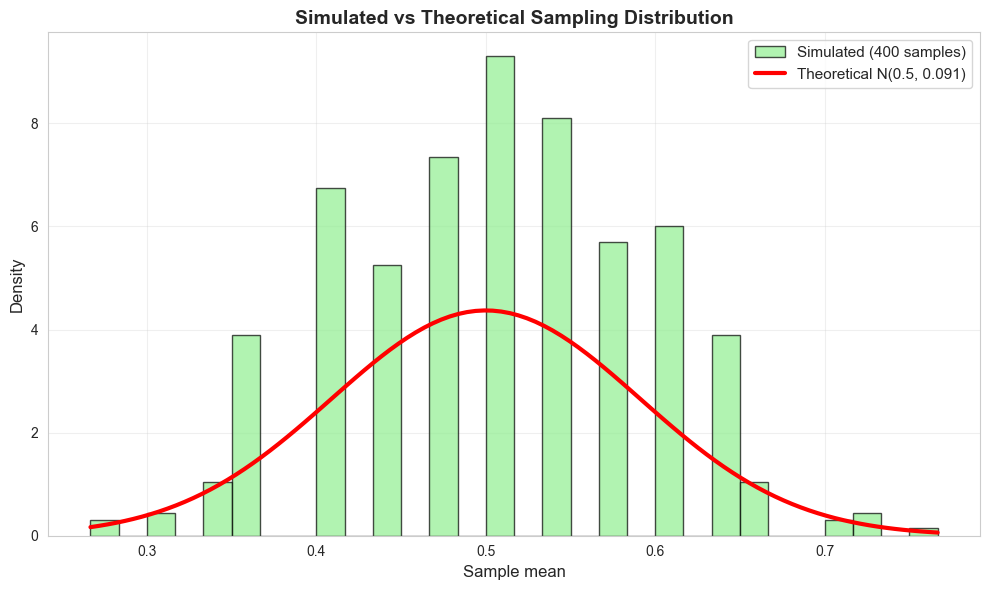

Simulation perfectly replicates theoretical predictions!
This validates both our code and the underlying theory.


In [12]:
# Visualize simulated distribution
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(result_mean, bins=30, density=True,
        edgecolor='black', alpha=0.7, color='lightgreen',
        label='Simulated (400 samples)')

# Overlay theoretical normal distribution
x_range = np.linspace(result_mean.min(), result_mean.max(), 100)
theoretical_pdf = stats.norm.pdf(x_range, 0.5, np.sqrt(0.25/30))
ax.plot(x_range, theoretical_pdf, 'r-', linewidth=3,
        label='Theoretical N(0.5, 0.091)')

ax.set_xlabel('Sample mean', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Simulated vs Theoretical Sampling Distribution',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Simulation perfectly replicates theoretical predictions!")
print("This validates both our code and the underlying theory.")

## Key Takeaways

**Random Variables and Sampling Distributions:**
- A random variable $X$ (uppercase) represents an uncertain outcome; its realization $x$ (lowercase) is the observed value
- The sample mean $\bar{x}$ is ONE realization of the random variable $\bar{X} = (X_1 + \cdots + X_n)/n$
- The sampling distribution of $\bar{X}$ describes how $\bar{x}$ varies across different samples from the same population
- Understanding that statistics are random variables is the foundation of statistical inference
- Example: Drawing 400 samples of coin tosses (n=30 each) produces 400 different sample means, revealing $\bar{X}$'s distribution

**Properties of the Sample Mean (Theoretical Results):**
- Under simple random sampling (common mean $\mu$, common variance $\sigma^2$, independence):
  - Mean: $\mathrm{E}[\bar{X}] = \mu$ (unbiased estimator)
  - Variance: $\operatorname{Var}[\bar{X}] = \sigma^2/n$ (precision increases with sample size)
  - Standard deviation: $\sigma_{\bar{X}} = \sigma/\sqrt{n}$ (decreases at rate $1/\sqrt{n}$)
- To halve the standard error, you must quadruple the sample size (e.g., from n=100 to n=400)
- The sample mean is less variable than individual observations since $\sigma^2/n < \sigma^2$
- As $n \rightarrow \infty$, $\bar{X}$ converges to $\mu$ because $\operatorname{Var}[\bar{X}] \rightarrow 0$

**Central Limit Theorem (Most Important Result):**
- For large $n$, $\bar{X} \sim N(\mu, \sigma^2/n)$ approximately
- Equivalently: $Z = (\bar{X} - \mu)/(\sigma/\sqrt{n}) \sim N(0,1)$ approximately
- This holds **regardless of the distribution of $X$** (as long as finite mean and variance exist)
- Rule of thumb: CLT works well for $n \geq 30$ in most cases
- Empirical evidence: Coin tosses (binary) → normal distribution of means; Census ages (highly skewed) → normal distribution of means
- Why this matters: Justifies using normal-based inference methods (confidence intervals, hypothesis tests) for almost any problem

**Standard Error (Estimated Standard Deviation):**
- Population standard deviation $\sigma_{\bar{X}} = \sigma/\sqrt{n}$ is unknown because $\sigma$ is unknown
- Standard error: se($\bar{X}$) = $s/\sqrt{n}$ where $s$ is sample standard deviation
- "Standard error" means "estimated standard deviation" (applies to any estimator, not just $\bar{X}$)
- Measures precision of $\bar{x}$ as an estimate of $\mu$—smaller is better
- Example: Coin toss with n=30 gives se ≈ 0.091; Census with n=25 gives se ≈ 3.72 years
- Used to construct confidence intervals and conduct hypothesis tests (Chapter 4)

**Desirable Estimator Properties:**
- **Unbiased:** $\mathrm{E}[\bar{X}] = \mu$ (correct on average, no systematic error)
- **Efficient:** Minimum variance among unbiased estimators (most precise)
- **Consistent:** Converges to $\mu$ as $n \rightarrow \infty$ (guaranteed by unbiasedness + variance → 0)
- The sample mean $\bar{X}$ satisfies all three properties under simple random sampling
- For normal, Bernoulli, binomial, and Poisson distributions, $\bar{X}$ is the best unbiased estimator
- Sample median is also unbiased (for symmetric distributions) but has higher variance than $\bar{X}$

**Empirical Validation:**
- Coin toss experiment (400 samples, n=30 each):
  - Mean of sample means: 0.4994 vs. theoretical 0.5000 ✓
  - SD of sample means: 0.0863 vs. theoretical 0.0913 ✓
  - Approximately normal distribution ✓
- Census ages (100 samples, n=25 each):
  - Mean of sample means: 23.78 vs. theoretical 24.13 ✓
  - SD of sample means: 3.76 vs. theoretical 3.72 ✓
  - Normal distribution despite highly non-normal population ✓
- Computer simulation replicates theoretical results perfectly

**Economic Applications:**
- Estimating average income, consumption, wages from household surveys
- Public opinion polling (sample proportion is a special case of sample mean)
- Macroeconomic indicators: unemployment rate, inflation, GDP growth (all based on samples)
- Quality control: manufacturing processes use sample means to monitor production
- Clinical trials: comparing average outcomes between treatment and control groups
- All regression coefficients (Chapters 6-7) have sampling distributions just like $\bar{X}$

**Connection to Statistical Inference (Chapter 4):**
- This chapter provides the theoretical foundation for confidence intervals
- We know $\bar{X} \sim N(\mu, \sigma^2/n)$ approximately
- This allows us to make probability statements about how far $\bar{x}$ is from $\mu$
- Example: Pr($\mu - 1.96 \cdot \sigma/\sqrt{n} < \bar{X} < \mu + 1.96 \cdot \sigma/\sqrt{n}$) ≈ 0.95
- Rearranging gives 95% confidence interval: $\bar{x} \pm 1.96 \cdot s/\sqrt{n}$

**Key Formulas to Remember:**
1. Mean of random variable: $\mu = \mathrm{E}[X] = \sum_x x \cdot \mathrm{Pr}[X=x]$
2. Variance: $\sigma^2 = \mathrm{E}[(X-\mu)^2] = \sum_x (x-\mu)^2 \cdot \mathrm{Pr}[X=x]$
3. Sample mean: $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$
4. Sample variance: $s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$
5. Mean of sample mean: $\mathrm{E}[\bar{X}] = \mu$
6. Variance of sample mean: $\operatorname{Var}[\bar{X}] = \sigma^2/n$
7. Standard error: se($\bar{X}$) = $s/\sqrt{n}$
8. Standardized sample mean: $Z = (\bar{X} - \mu)/(\sigma/\sqrt{n}) \sim N(0,1)$

---

**Next Steps:**
- **Chapter 4** uses these results to construct confidence intervals and test hypotheses about $\mu$
- **Chapters 6-7** extend the same logic to regression coefficients (which are also sample statistics with sampling distributions)
- The conceptual framework developed here applies to ALL statistical inference in econometrics


## Practice Exercises

Test your understanding of the sample mean and sampling distributions:

**Exercise 1:** Random variable properties
- Suppose $X = 100$ with probability 0.8 and $X = 600$ with probability 0.2
- (a) Calculate the mean $\mu = \mathrm{E}[X]$
- (b) Calculate the variance $\sigma^2 = \mathrm{E}[(X-\mu)^2]$
- (c) Calculate the standard deviation $\sigma$

**Exercise 2:** Sample mean properties
- Consider random samples of size $n = 25$ from a random variable $X$ with mean $\mu = 100$ and variance $\sigma^2 = 400$
- (a) What is the mean of the sample mean $\bar{X}$?
- (b) What is the variance of the sample mean $\bar{X}$?
- (c) What is the standard deviation (standard error) of the sample mean?

**Exercise 3:** Central Limit Theorem application
- A population has mean $\mu = 50$ and standard deviation $\sigma = 12$
- You draw a random sample of size $n = 64$
- (a) What is the approximate distribution of $\bar{X}$ (by the CLT)?
- (b) What is the probability that $\bar{X}$ falls between 48 and 52?
- (c) Would this probability be larger or smaller if $n = 144$? Why?

**Exercise 4:** Standard error interpretation
- Two researchers estimate average income in a city
  - Researcher A uses $n = 100$, gets $\bar{x}_A = \$52,000$, $s_A = \$15,000$
  - Researcher B uses $n = 400$, gets $\bar{x}_B = \$54,000$, $s_B = \$16,000$
- (a) Calculate the standard error for each researcher
- (b) Which estimate is more precise? Why?
- (c) Are these estimates statistically different? (Compare the difference to the standard errors)

**Exercise 5:** Consistency
- Explain why the sample mean $\bar{X}$ is a consistent estimator of $\mu$
- Show that both conditions for consistency are satisfied: bias → 0 and variance → 0 as $n \rightarrow \infty$

**Exercise 6:** Simulation
- Using Python, simulate 1,000 samples of size $n = 50$ from a uniform distribution U(0, 10)
- (a) Calculate the sample mean for each of the 1,000 samples
- (b) Compute the mean and standard deviation of these 1,000 sample means
- (c) Compare with theoretical values: $\mu = 5$, $\sigma^2/n = (100/12)/50 = 0.1667$
- (d) Create a histogram and verify approximate normality

**Exercise 7:** Sample size calculation
- You want to estimate average household expenditure on food with a standard error of \$10
- From pilot data, you know $\sigma \approx \$80$
- (a) What sample size $n$ do you need?
- (b) If you double the desired precision (se = \$5), how does the required sample size change?

**Exercise 8:** Unbiasedness vs. efficiency
- The sample median is also an unbiased estimator of $\mu$ when the population is symmetric
- (a) Explain what "unbiased" means in this context
- (b) Why do we prefer the sample mean to the sample median for estimating $\mu$?
- (c) For what type of population distribution might the median be preferable?

---
